# Random Forests Regression

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [3]:
df = pd.read_csv('data/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Prep:

In [4]:
# Convert binary var to 1 and 0.
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no


In [5]:
df[varlist] = df[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
# Create dummy var for other categorical var. (furnishingstatus)
status = pd.get_dummies(df['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [8]:
status = pd.get_dummies(df['furnishingstatus'], drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [9]:
#concat with original df and drop old furnishingstatus var.
df = df.drop('furnishingstatus', axis=1)
df = pd.concat([df, status], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [10]:
# Split the data into x and y variables.
X = df.drop('price', axis=1)
y = df['price']

In [11]:
#Split the data into train and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
print(X_train.shape)
print(X_test.shape)

(381, 13)
(164, 13)


# Model Building

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rf = RandomForestRegressor(random_state=100, n_jobs=-1, max_depth=5, min_samples_leaf=10)

In [15]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=100)

In [21]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.metrics import confusion_matrix, accuracy_score


# Creating helper functions to evaluate model performance and help plot the decision tree

def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [18]:
sample_tree = rf.estimators_[10]

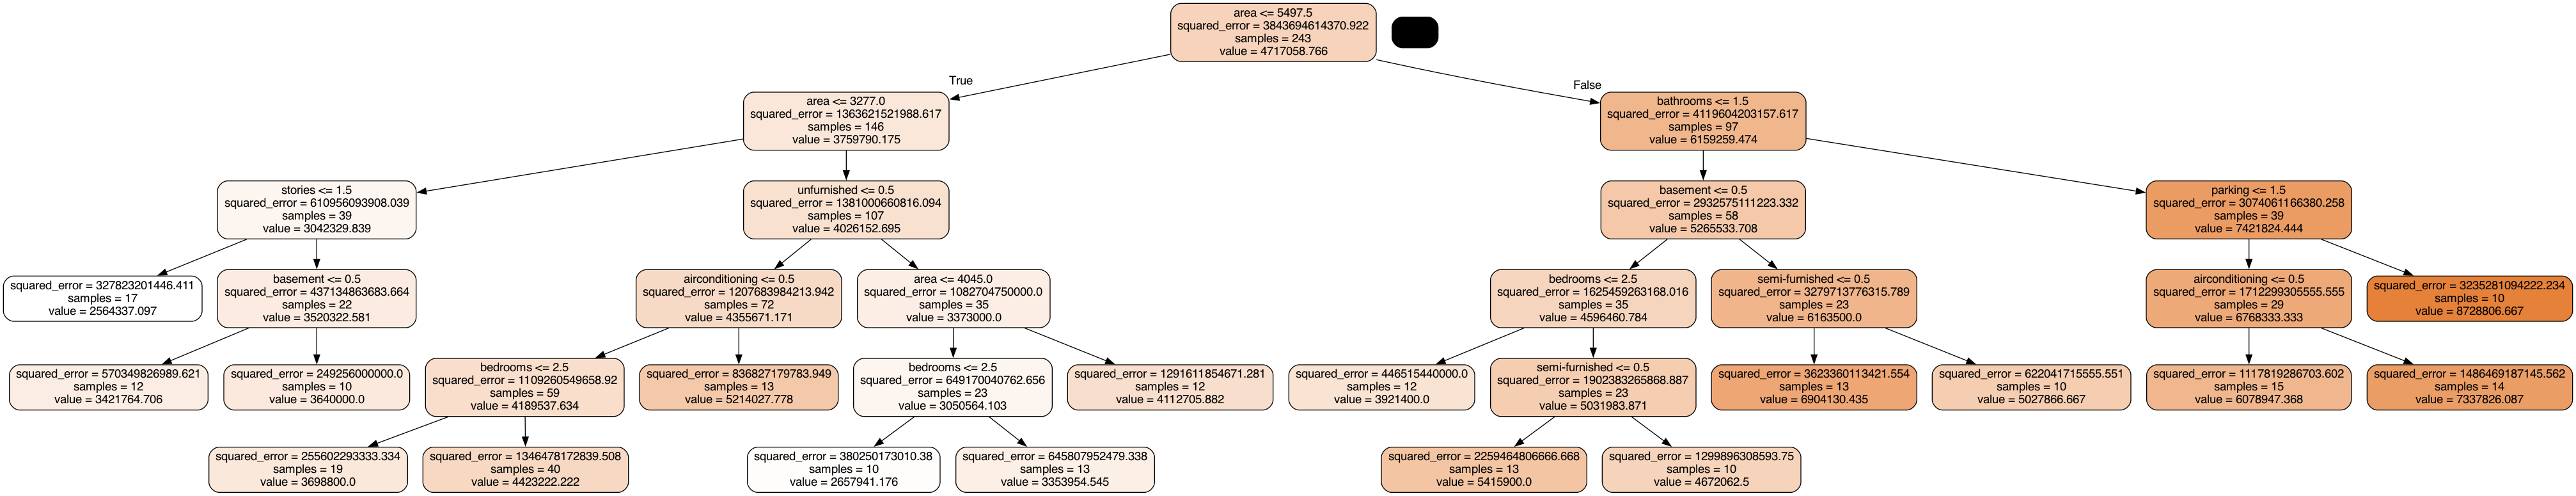

In [19]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

In [23]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [24]:
#Evaluate the model
from sklearn.metrics import r2_score

r2_score(y_train, y_train_pred)

0.6753054001007727

In [28]:
# Get Important variables.

rf.feature_importances_

array([0.54247824, 0.01898609, 0.24338203, 0.02406959, 0.00432114,
       0.007568  , 0.01801387, 0.        , 0.04200547, 0.03401143,
       0.02521637, 0.00637703, 0.03357074])

In [26]:
imp_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Imp': rf.feature_importances_
})

In [27]:
imp_df.sort_values(by='Imp', ascending=False)

,Variable,Imp
0,area,0.542478
2,bathrooms,0.243382
8,airconditioning,0.042005
9,parking,0.034011
12,unfurnished,0.033571
10,prefarea,0.025216
3,stories,0.024070
1,bedrooms,0.018986
6,basement,0.018014
5,guestroom,0.007568
